Analemma Plotter

The analemma is the figure draw by a celestial body in the sky as it orbits around the Earth

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

In [2]:
#Orbital parameters

a = 1.49589023e11    #semi-major axis
e = 0.0489   #eccentricity
f0 = np.deg2rad(125)    #angle between north equinox and aspis line
i = np.deg2rad(30)     #Inclination on the obital plane
T_rot = 1 #Earth rotation period
T_rev = 10476.8*T_rot  #Earth revolution period
N = T_rev/T_rot #Rotations per revolutions
n_rev = 2.0*np.pi/T_rev #Mean angular velocity
n_rot = 2.0*np.pi/T_rot
T_day = T_rot*(N+1)/N   #Mean day
N = round(N)

In [3]:
def E(f, e):
  return 2.0*np.arctan(((1-e)/(1+e))**0.5*np.tan(0.5*f))

def f(E, e):
  return 2.0*np.arctan(((1+e)/(1-e))**0.5*np.tan(0.5*E))

def KeplerEq(M, e, rtol= 1e-9): #Solving the Kepler equation for E
  E = M
  while(np.abs(M-E+e*np.sin(E)) > E*rtol):
    E = E - (E-e*np.sin(E)-M)/(1-e*np.cos(E)) #Newton-Raphson method
  return E

def cartesianCoord(a, e, E):
  return np.array([a*(np.cos(E)-e), a*(1-e**2)**0.5*np.sin(E), 0.0])

In [4]:
def angularCoord(x):
  r = np.linalg.norm(x)
  theta = np.arccos(x[2]/r)
  phi = np.arctan2(x[1],x[0])
  phi = phi if phi>0 else phi+2*np.pi #Mapping from -pi pi to 0-2pi
  return np.array([np.rad2deg(phi), np.rad2deg(0.5*np.pi-theta)])

In [5]:
pos = np.zeros((N,3))
rel_pos = np.zeros((N,3))
sky_pos = np.zeros((N,2))
day_len = np.zeros(N)
E0 = E(f0,e)
E_last = E0
for j in range(N):
  E = KeplerEq(n_rev*j*T_day+E0, e)
  pos[j] = cartesianCoord(a, e, E)
  
  #Positions in the Earth local frame
  
  r = R.from_euler('zxz', [0.0, -i, -(j*T_day*n_rot-0.5*np.pi),])
  rel_pos[j] = r.apply(pos[j])
  sky_pos[j] = angularCoord(rel_pos[j])
  
  
   #The lenght of the day is given by the rotation period plus the time needed to cover the difference in true anomaly
  day_len[j] = (1+(f(E, e)-f(E0, e))/(2.0*np.pi))*T_rot  
  E_last = E
 


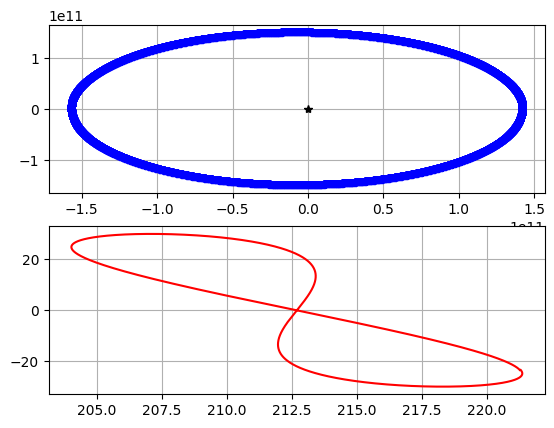

In [6]:
fig = plt.figure()
orbit = fig.add_subplot(211)
orbit.grid()
orbit.plot(0.0, 0.0, 'k*')
orbit.plot(pos[:, 0], pos[:, 1], 'b*')

sky = fig.add_subplot(212)
sky.grid()
sky.plot(sky_pos[:,0], sky_pos[:,1], 'r-')